# **Análisis de Factores de Riesgo de Ataques Cardíacos**

Autor: Pol García

## 1. Introducción

Las enfermedades cardíacas representan una de las principales causas de mortalidad a nivel mundial. Entender qué factores aumentan el riesgo es fundamental para desarrollar estrategias de prevención eficaces.

El objetivo de este proyecto es ir más allá de una simple exploración. A través de un Análisis Exploratorio de Datos (EDA) sobre un conjunto de datos de salud, buscamos no solo identificar los principales factores de riesgo asociados a los ataques cardíacos, sino también cuantificar su impacto. El análisis culminará con la extracción de insights accionables que puedan servir de base para la creación de campañas de prevención focalizadas y efectivas.

In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [ ]:
# Eliminar warnings
warnings.filterwarnings('ignore')

In [ ]:
# Configuración para que los gráficos se muestren correctamente
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('muted')
palette=sns.color_palette()

In [ ]:
# Cargar y mostrar dataset
df = pd.read_csv('heart_2022_with_nans.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
# Información data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [ ]:
# Contar valores nulos
print('Contamos valores nulos:')
print(df.isnull().sum())

Contamos valores nulos:
State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56

## 2. Limpieza y Preparación de Datos

El primer paso es manejar los valores nulos, para que el analisis sea más detallado:
 . Rellenamos las variables numericas con  la mediana. Para las variables categoricas rellenamos con la moda.

In [ ]:
# Lista de columnas numéricas con valores nulos
columnas_numericas = [
    'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
    'HeightInMeters', 'WeightInKilograms', 'BMI'
]

# Rellenar los valores nulos con la mediana de cada columna
for col in columnas_numericas:
    mediana = df[col].median()
    df[col]=df[col].fillna(mediana)

print('✅ Valores nulos en columnas numéricas rellenados.')

# Lista de columnas categóricas con valores nulos
columnas_categoricas = [
    'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth',
    'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
    'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan',
    'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting',
    'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear',
    'CovidPos'
]

print('✅ Valores nulos en columnas categóricas rellenados.')

# Rellenar los valores nulos con la moda de cada columna
for col in columnas_categoricas:
    moda = df[col].mode()[0]
    df[col]= df[col].fillna(moda)


# Verificar si todavía quedan valores nulos
print('Suma total de valores nulos por columna después de la imputación:')
print(df.isnull().sum())

✅ Valores nulos en columnas numéricas rellenados.
✅ Valores nulos en columnas categóricas rellenados.
Suma total de valores nulos por columna después de la imputación:
State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage           

In [ ]:
# Renombrar columnas

df.rename(columns={
    'GeneralHealth': 'General_Health',
    'PhysicalHealthDays': 'Physical_Health_Days',
    'MentalHealthDays': 'Mental_Health_Days',
    'LastCheckupTime': 'Last_Checkup',
    'PhysicalActivities': 'Physical_Activities',
    'SleepHours': 'Sleep_Hours',
    'RemovedTeeth': 'Removed_Teeth',
    'HadAngina' : 'Angina',
    'HadStroke': 'Stroke',
    'HadHeartAttack': 'Heart_Attack',
    'HadAsthma': 'Asthma',
    'HadSkinCancer': 'Skin_Cancer',
    'HadCOPD': 'EPOC',
    'HadDepressiveDisorder': 'Depressive',
    'HadKidneyDisease': 'Kidney_Disease',
    'HadArthritis': 'Arthritis',
    'HadDiabetes': 'Diabetes',
    'DeafOrHardOfHearing': 'Deaf_Or_Hard_Of_Hearing',
    'DifficultyConcentrating': 'Dif_Concentrating',
    'DifficultyWalking': 'Dif_Walking',
    'DifficultyDressingBathing': 'Dif_Dressing_Bathing',
    'DifficultyErrands': 'Dif_Errands',
    'SmokerStatus': 'Smoker_Status',
    'ECigaretteUse': 'ECigarette_Use',
    'RaceEthnicityCategory': 'Race_Ethnicity',
    'AgeCategory': 'Age',
    'HeightInMeters': 'Height(m)',
    'WeightInKilograms': 'Weight(kg)',
    'AlcoholDrinkers' : 'Alcohol_Drinkers',
    'HIVTesting' : 'HIV',
    'FluVaxLast12' : 'Flu_Vax_Last_12',
    'PneumoVaxEver' : 'Pneumo_Vax',
    'TetanusLast10Tdap' : 'Tetanus_Last_10',
    'HighRiskLastYear' : 'High_Risk_Last_Year',
    'CovidPos' : 'Covid_pos'

}, inplace=True)
df.head()

,State,Sex,General_Health,Physical_Health_Days,Mental_Health_Days,Last_Checkup,Physical_Activities,Sleep_Hours,Removed_Teeth,Heart_Attack,...,Height(m),Weight(kg),BMI,Alcohol_Drinkers,HIV,Flu_Vax_Last_12,Pneumo_Vax,Tetanus_Last_10,High_Risk_Last_Year,Covid_pos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,None of them,No,...,1.70,80.74,27.44,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,No,6.0,None of them,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,None of them,No,...,1.57,63.50,25.61,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


## 3. Análisis Exploratorio de Datos (EDA)

Una vez que los datos están limpios, vamos a explorar las relaciones entre las variables para identificar patrones y factores de riesgo.

% Heart_Attack
No     420024
Yes     25108
Name: count, dtype: int64


% Heart_Attack
No     94.36
Yes     5.64
Name: proportion, dtype: float64




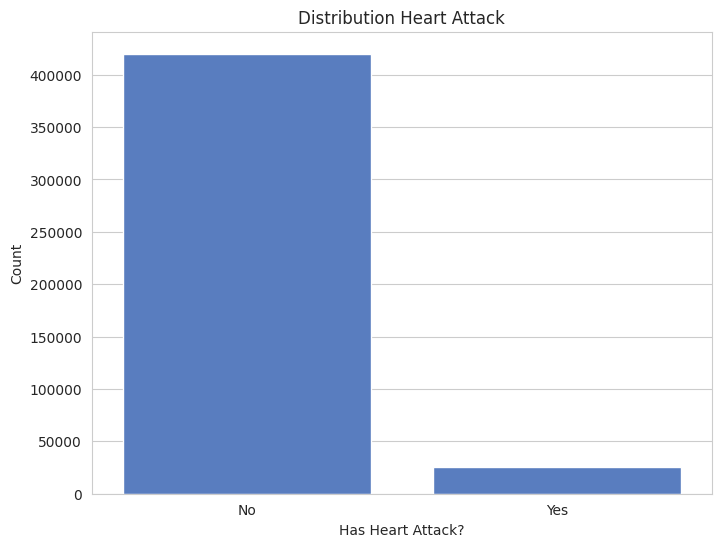

In [ ]:
# Calcular la distribución
distribution = df['Heart_Attack'].value_counts()
print(f'% {distribution.round(2)}')
print('\n')

# Calcular porcentage
distribution_per = df['Heart_Attack'].value_counts(normalize=True)*100
print(f'% {distribution_per.round(2)}')
print('\n')

# Analizar la distribución de la variable objetivo 'Heart_Attack'
plt.figure(figsize=(8, 6))
sns.countplot(x='Heart_Attack', data=df, order=df['Heart_Attack'].value_counts().index)
plt.title('Distribution Heart Attack')
plt.xlabel('Has Heart Attack?')
plt.ylabel('Count')
plt.show()

Dataset Desbalanceado: Se observa una prevalencia de ataques cardíacos del 5.64% en el dataset. Este desequilibrio es fundamental y será tenido en cuenta durante la fase de modelado para asegurar la validez de las predicciones

### 3.1 Análisis exploratorio de los factores epidemiologicos

#### 3.1.1 Por edad

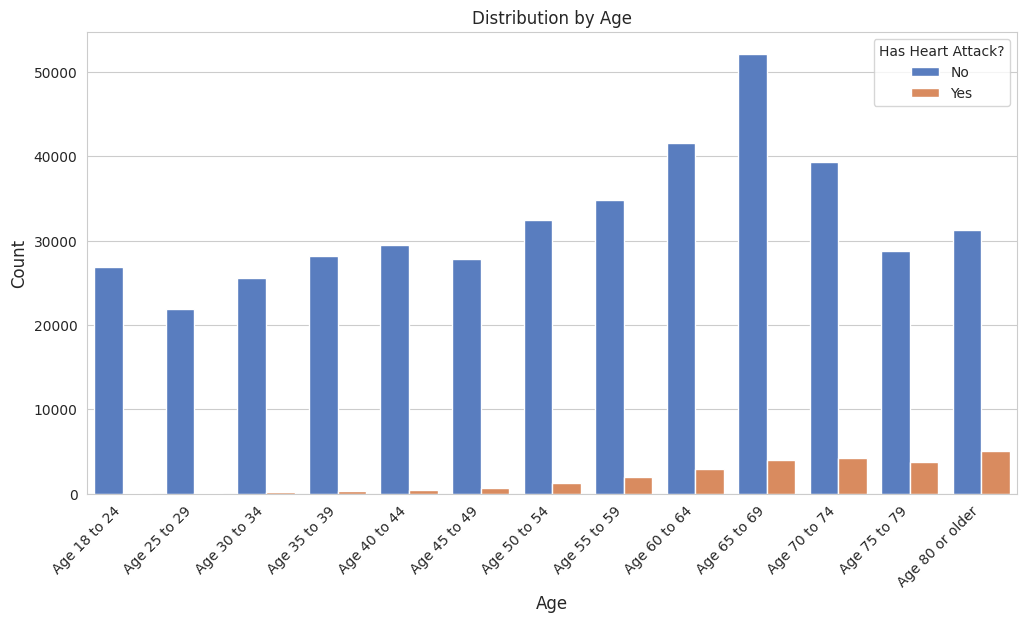

In [ ]:
# Analizar la distribución por rango de edad
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age', hue='Heart_Attack', order=sorted(df['Age'].unique()))
plt.title('Distribution by Age')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Has Heart Attack?')
plt.show()

In [ ]:
# Para que el gráfico sea más visual nos centraremos en los que sí han padecido un ataque al corazón
df_yes = df[df['Heart_Attack']=='Yes']

In [ ]:
# Cálculo de la tasa base
tax_yes = df['Heart_Attack'].value_counts(normalize=True)['Yes']*100
print(f'Base Rate: {tax_yes:.2f}%')

Base Rate: 5.64%


Risk by Age:
 Heart_Attack        No   Yes
Age                         
Age 18 to 24     26819   122
Age 25 to 29     21871   119
Age 30 to 34     25620   187
Age 35 to 39     28208   318
Age 40 to 44     29497   445
Age 45 to 49     27803   728
Age 50 to 54     32394  1250
Age 55 to 59     34861  1960
Age 60 to 64     41621  2890
Age 65 to 69     52118  4060
Age 70 to 74     39256  4216
Age 75 to 79     28729  3789
Age 80 or older  31227  5024




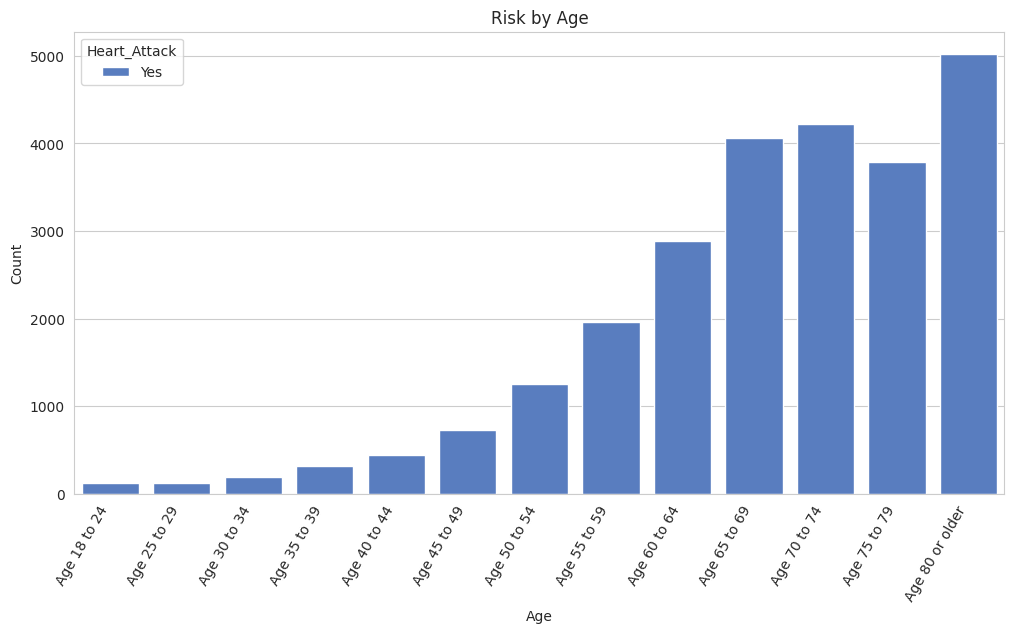

In [ ]:
# Recuento del riesgo por edad
risk_age = df.groupby('Age')['Heart_Attack'].value_counts().unstack()
print('Risk by Age:\n', risk_age)
print('\n')

# Distribución ataques al corazón por edad
plt.figure(figsize=(12,6))
sns.countplot(data=df_yes, x='Age', hue='Heart_Attack', order=sorted(df['Age'].unique()))
plt.title('Risk by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=60, ha='right')
plt.show()

Risk by Age:
Age
Age 18 to 24        0.45
Age 25 to 29        0.54
Age 30 to 34        0.72
Age 35 to 39        1.11
Age 40 to 44        1.49
Age 45 to 49        2.55
Age 50 to 54        3.72
Age 55 to 59        5.32
Age 60 to 64        6.49
Age 65 to 69        7.23
Age 70 to 74        9.70
Age 75 to 79       11.65
Age 80 or older    13.86
Name: Yes, dtype: float64




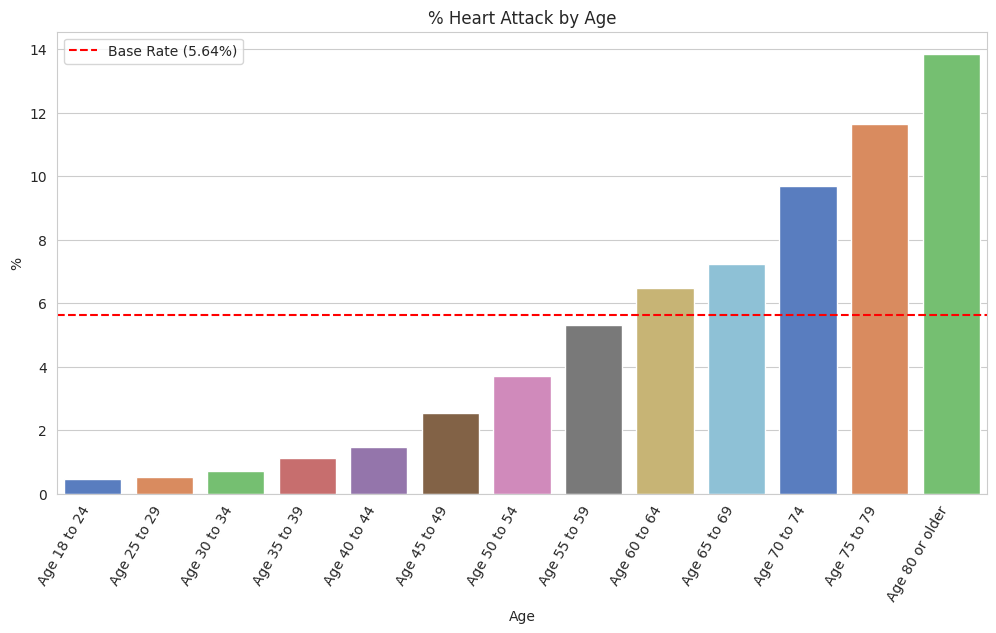

In [ ]:
# Calculo del porcenbtage de ataques por edad
tax_by_age = df.groupby('Age')['Heart_Attack'].value_counts(normalize=True).unstack()*100
print(f'Risk by Age:\n{tax_by_age['Yes'].round(2)}')
print('\n')

#Gráfica
plt.figure(figsize=(12, 6))
sns.barplot(x=tax_by_age.index, y=tax_by_age['Yes'], palette=palette)
plt.axhline(y=tax_yes, color='red', linestyle='--', label=f'Base Rate ({tax_yes:.2f}%)') # Visualizar tasa base
plt.title('% Heart Attack by Age')
plt.xlabel('Age')
plt.ylabel('%')
plt.xticks(rotation=60, ha='right')
plt.legend()
plt.show()

La Edad como Factor Crítico: El riesgo de sufrir un ataque cardíaco aumenta de forma exponencial con la edad. Se identifica un punto de inflexión clave a partir de los 60 años, donde la probabilidad supera significativamente la tasa base de la población.

#### 3.1.2 Por género

Distribution by Sex:
 Heart_Attack      No    Yes
Sex                        
Female        226202   9691
Male          193822  15417




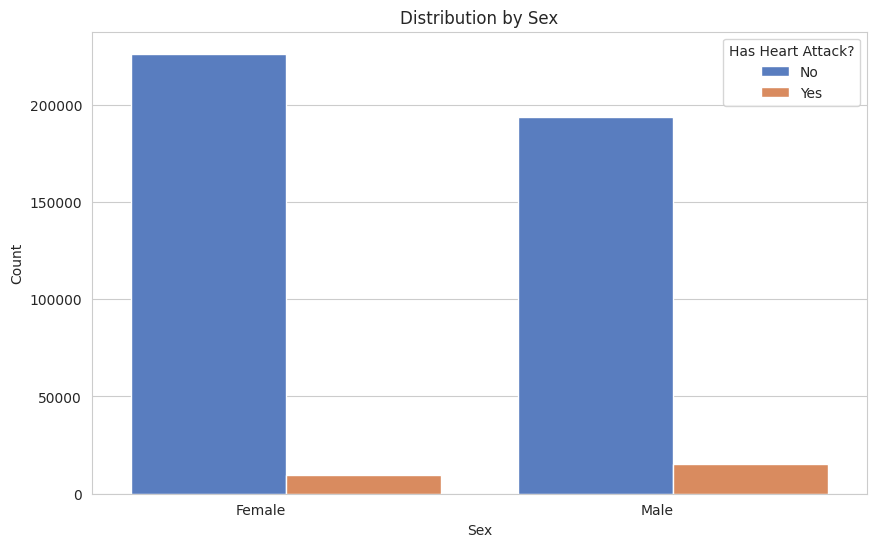

In [ ]:
# Analizar el riesgo por categoría de edad

# Recuento del riesgo por edad
risk_sex = df.groupby('Sex')['Heart_Attack'].value_counts().unstack()
print('Distribution by Sex:\n', risk_sex)
print('\n')

# Visualizamos los datos
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue='Heart_Attack', order=sorted(df['Sex'].unique()))
plt.title('Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ha='right')
plt.legend(title='Has Heart Attack?')
plt.show()

Heart_Attack    Yes
Sex                
Female         9691
Male          15417




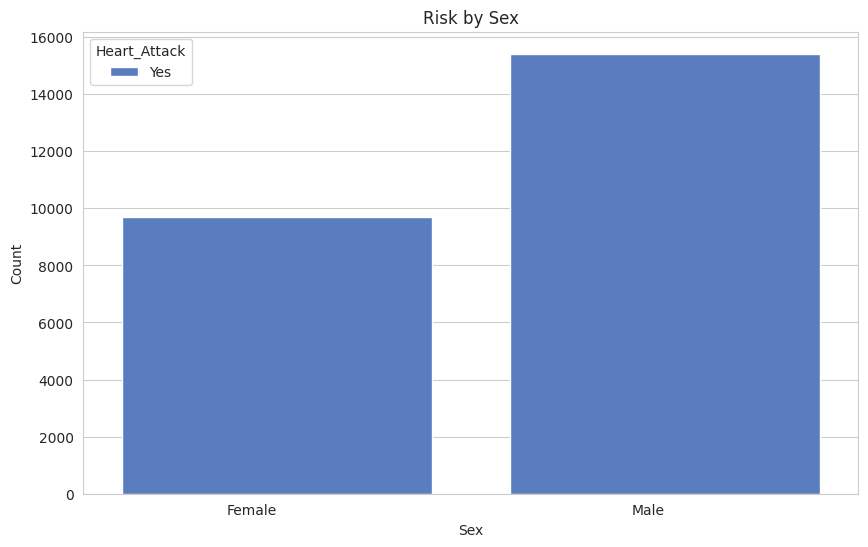

In [ ]:
# Recuento con ataques al corazón por edad
risk_sex = df_yes.groupby('Sex')['Heart_Attack'].value_counts().unstack()
print( risk_sex)
print('\n')

# Distribución ataques al corazón por edad
plt.figure(figsize=(10,6))
sns.countplot(data=df_yes, x='Sex', hue='Heart_Attack', order=sorted(df['Sex'].unique()))
plt.title('Risk by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ha='right')
plt.show()

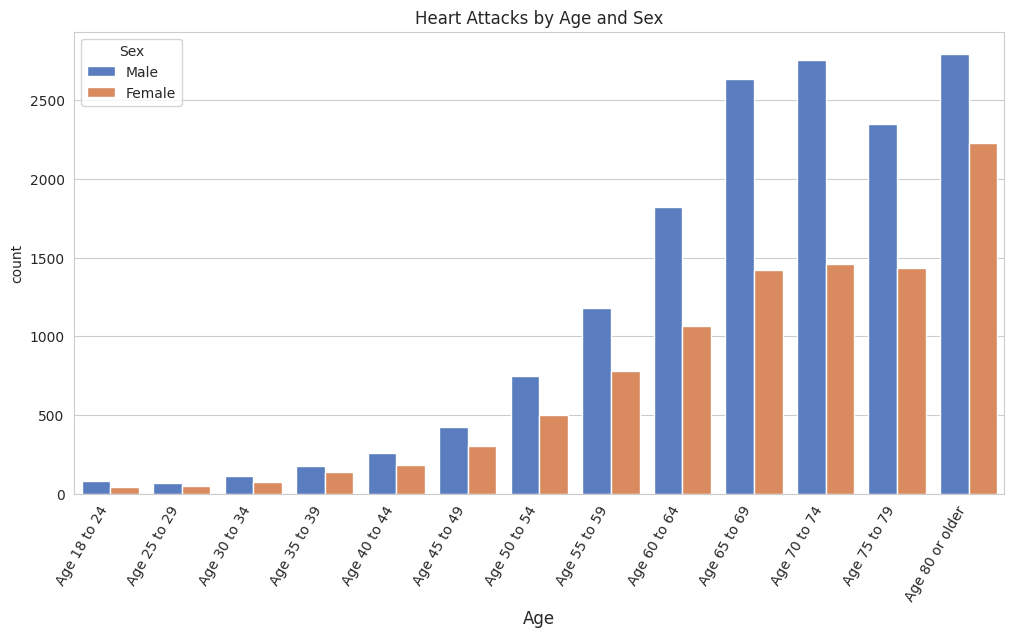

In [ ]:
# Gráfica de la distribución de los que han sufrido un ataque al corazón por edad y sexo
plt.figure(figsize=(12, 6))
sns.countplot(data=df_yes, x='Age', hue='Sex', order=sorted(df['Age'].unique()))
plt.title('Heart Attacks by Age and Sex')
plt.xlabel('Age', fontsize=12)
plt.legend(title='Sex')
plt.xticks(rotation=60, ha='right')
plt.show()

Sex
Female    4.11
Male      7.37
Name: Yes, dtype: float64




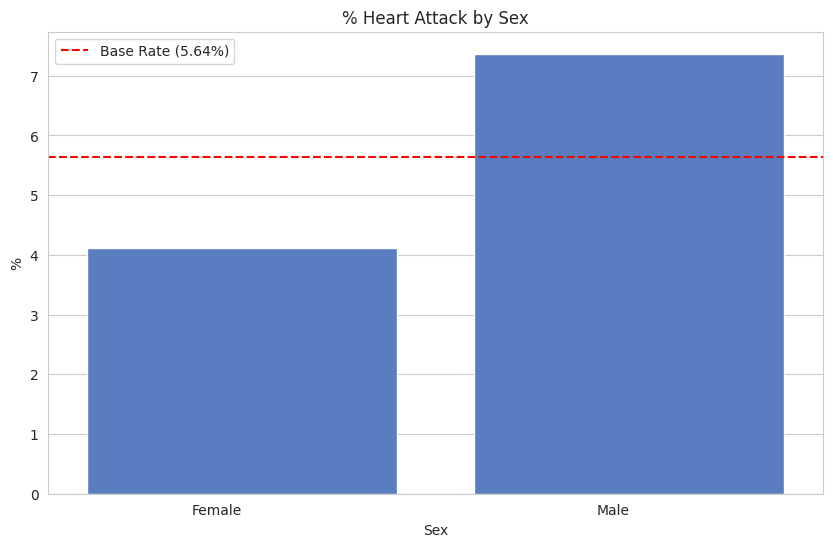

In [ ]:
# Calculo del porcentage de ataques por edad
tax_by_sex = df.groupby('Sex')['Heart_Attack'].value_counts(normalize=True).unstack()*100
print(tax_by_sex['Yes'].round(2))
print('\n')

#Gráfica
plt.figure(figsize=(10, 6))
sns.barplot(x=tax_by_sex.index, y=tax_by_sex['Yes'])
plt.axhline(y=tax_yes, color='red', linestyle='--', label=f'Base Rate ({tax_yes:.2f}%)') # Visualizar tasa base
plt.title('% Heart Attack by Sex')
plt.xlabel('Sex')
plt.ylabel('%')
plt.xticks(ha='right')
plt.legend()
plt.show()

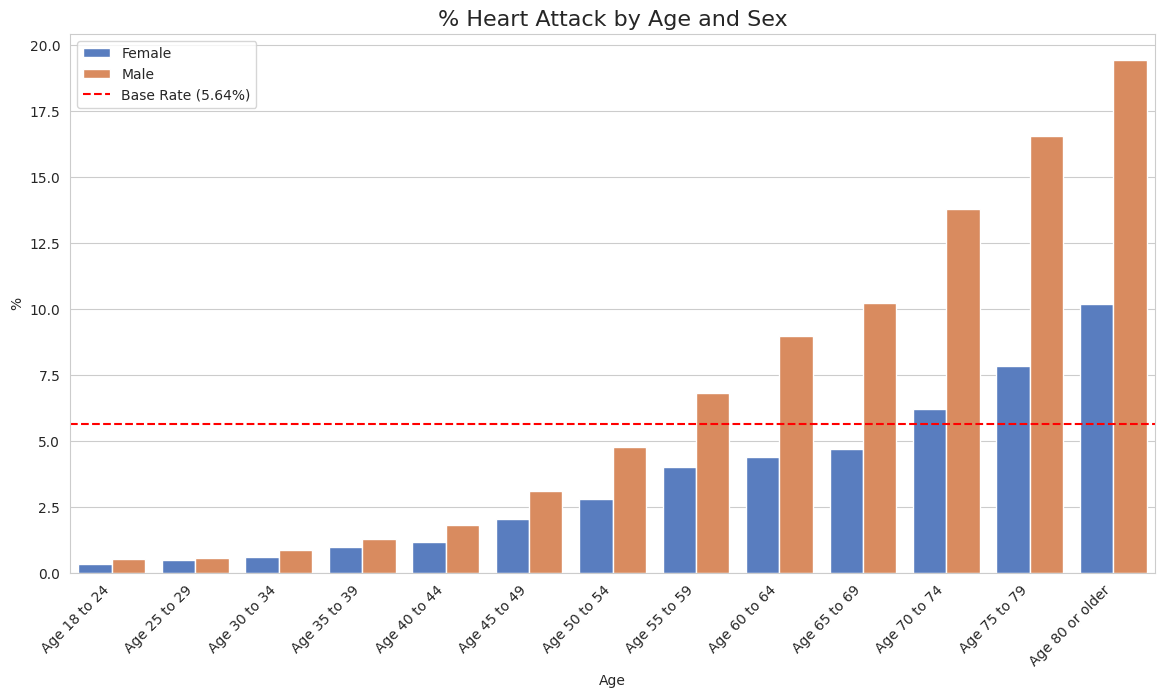

In [ ]:
# Calcular porcentage por edad y sexo
per_age_sex = df.groupby(['Age', 'Sex'])['Heart_Attack'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index(name='Percentage')

# Visualizar la interacción entre Edad y Género
plt.figure(figsize=(14, 7))
sns.barplot(data=per_age_sex, x='Age', y='Percentage', hue='Sex', palette=palette)
plt.axhline(y=tax_yes, color='red', linestyle='--', label=f'Base Rate ({tax_yes:.2f}%)')
plt.title('% Heart Attack by Age and Sex', fontsize=16)
plt.ylabel('%')
plt.xlabel('Age')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

Diferencia de Género: Los hombres presentan una mayor incidencia y probabilidad de sufrir ataques cardíacos en todos los grupos de edad. Alcanzan el umbral de riesgo de la tasa base a los 55 años, mientras que las mujeres lo hacen a los 70 años, evidenciando una ventana de vulnerabilidad más temprana en el género masculino.

#### 3.1.3 Por etnia

Distribution by Ethnicity:
 Heart_Attack                       No    Yes
Race_Ethnicity                              
Black only, Non-Hispanic        33768   1678
Hispanic                        41292   1625
Multiracial, Non-Hispanic        8989    589
Other race only, Non-Hispanic   21683   1030
White only, Non-Hispanic       314292  20186 



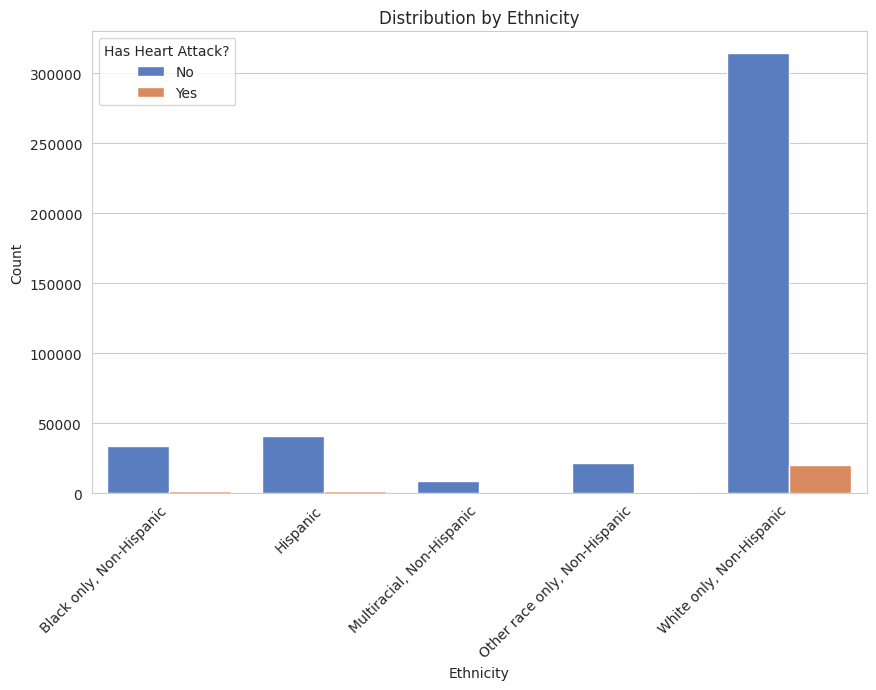

In [ ]:
# Analizar el riesgo por etnia

# Cálculo el riesgo por etnia
risk_race = df.groupby('Race_Ethnicity')['Heart_Attack'].value_counts().unstack()
print('Distribution by Ethnicity:\n', risk_race, '\n')

# Visualizamos los datos
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Race_Ethnicity', hue='Heart_Attack', order=sorted(df['Race_Ethnicity'].unique()))
plt.title('Distribution by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Has Heart Attack?')
plt.show()

Para una visualización más detallada nos centraremos en los que sí han padecido un ataque al corazón.

Race_Ethnicity
Black only, Non-Hispanic          1678
Hispanic                          1625
Multiracial, Non-Hispanic          589
Other race only, Non-Hispanic     1030
White only, Non-Hispanic         20186
Name: Yes, dtype: int64




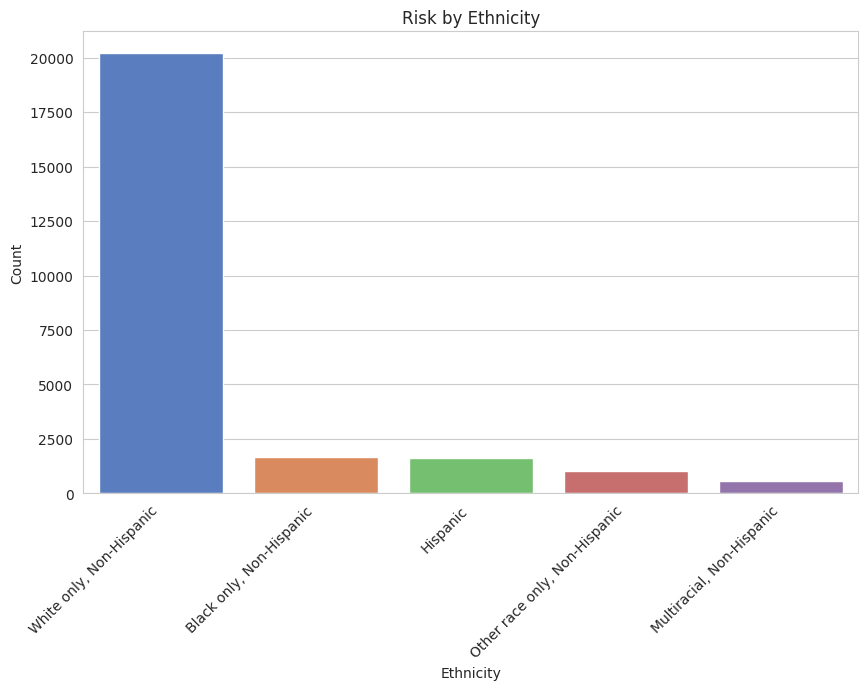

In [ ]:
# Calculo del porcenbtage de ataques por edad
count_by_etn = df_yes.groupby('Race_Ethnicity')['Heart_Attack'].value_counts().unstack()
print(f'{count_by_etn['Yes'].round(2)}')
print('\n')

# Distribución ataques al corazón por etnia
order_race = df_yes['Race_Ethnicity'].value_counts().index
plt.figure(figsize=(10,6))
sns.countplot(data=df_yes, x='Race_Ethnicity', order=order_race, palette=palette)
plt.title('Risk by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Influencia de la Etnia: Aunque la población caucásica no hispánica representa el mayor número de casos en términos absolutos, un análisis normalizado revela que los individuos que se identifican como blancos o multirraciales tienen una probabilidad ligeramente superior de sufrir un evento cardíaco.

Race_Ethnicity
Black only, Non-Hispanic         4.73
Hispanic                         3.79
Multiracial, Non-Hispanic        6.15
Other race only, Non-Hispanic    4.53
White only, Non-Hispanic         6.04
Name: Yes, dtype: float64




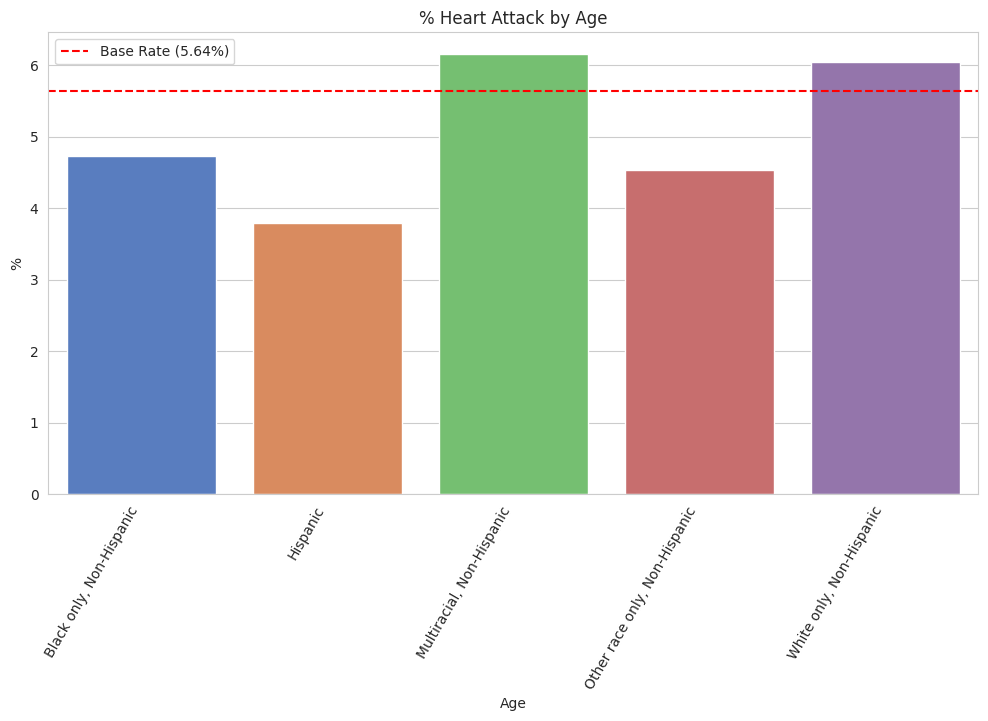

In [ ]:
# Cálculo del porcenbtage de ataques por edad
tax_by_etn = df.groupby('Race_Ethnicity')['Heart_Attack'].value_counts(normalize=True).unstack()*100
print(f'{tax_by_etn['Yes'].round(2)}')
print('\n')

# Gráfica
plt.figure(figsize=(12, 6))
sns.barplot(x=tax_by_etn.index, y=tax_by_etn['Yes'], palette=palette)
plt.axhline(y=tax_yes, color='red', linestyle='--', label=f'Base Rate ({tax_yes:.2f}%)')
plt.title('% Heart Attack by Age')
plt.xlabel('Age')
plt.ylabel('%')
plt.xticks(rotation=60, ha='right')
plt.legend()
plt.show()

Se observa como la gente blanca y los multiraciales tienen más de probabilidades de sufrir un ataque al corazón superando la tasa base.

#### Conclusión Epidemiológica Parcial:
El perfil demográfico de mayor riesgo corresponde a un hombre, de etnia blanca o multirracial, mayor de 55 años.

### 3.2 Análisis de factores de riesgo

In [ ]:
# Preparación del análisis de factores de riesgo por categoria

# Copia del df
df1 = df.copy()

# Convertir objetivo a número
df1['Heart_Attack_Num'] = df1['Heart_Attack'].apply(lambda x: 1 if x == 'Yes' else 0)

# Separar variables en dos columnas
categorical_cols = [
    'Sex', 'General_Health', 'Last_Checkup', 'Physical_Activities',
    'Removed_Teeth', 'Angina', 'Stroke', 'Asthma', 'Skin_Cancer', 'EPOC',
    'Depressive', 'Kidney_Disease', 'Arthritis', 'Diabetes', 'Deaf_Or_Hard_Of_Hearing',
    'BlindOrVisionDifficulty', 'Dif_Concentrating', 'Dif_Walking', 'Dif_Dressing_Bathing',
    'Dif_Errands', 'Smoker_Status', 'ECigaretteUsage', 'ChestScan', 'Race_Ethnicity',
    'Alcohol_Drinkers', 'HIV', 'Flu_Vax_Last_12', 'Pneumo_Vax', 'Tetanus_Last_10',
    'High_Risk_Last_Year', 'Covid_pos'
]
numerical_cols = ['Physical_Health_Days', 'Mental_Health_Days', 'Sleep_Hours', 'Age', 'BMI']

# 3. Crear grupos para las columnas numéricas
binned_cols = []
for col in numerical_cols:
    binned_col_name = f'{col}_Binned'
    df1[binned_col_name] = pd.qcut(df[col].rank(method='first'), q=4, labels=['Q1 (Bajo)', 'Q2', 'Q3', 'Q4 (Alto)'])  # Dividir en cuartiles
    binned_cols.append(binned_col_name)

# Lista final
final_cols_to_analyze = categorical_cols + binned_cols

# Función
def analizar_factores_de_riesgo(datos, columnas, columna_objetivo, umbral_minimo=50):

    resultados = []

    # Calculo del riesgo promedio
    riesgo_promedio = datos[columna_objetivo].mean()
    print(f"The average risk in this group is distributed by age.: {riesgo_promedio:.2%}\n")

    # Recorrer cada columna que se quiere analizar
    for col in columnas:

        # Agrupar y calcular la media y el tamaño de cada grupo
        analisis_grupo = datos.groupby(col, observed=True)[columna_objetivo].agg(['mean', 'size'])

        # Filtrar los grupos que son demasiado pequeños
        grupos_fiables = analisis_grupo[analisis_grupo['size'] >= umbral_minimo]

        # Si no queda ningún grupo fiable, pasar a la siguiente columna
        if grupos_fiables.empty:
            continue

        # 3. Ordenar categoría con el riesgo más alto
        grupos_fiables = grupos_fiables.sort_values(by='mean', ascending=False)

        # Coger los datos de mayor riesgo
        categoria_top = grupos_fiables.iloc[0]

        resultados.append({
            'Factor': col,
            'High Risk Category': categoria_top.name,
            'Risk Rate (%)': categoria_top['mean'] * 100,
            'Number of People in Category': int(categoria_top['size'])
        })

    # Ordenar
    tabla_resultados = pd.DataFrame(resultados)
    tabla_resultados = tabla_resultados.sort_values(by='Risk Rate (%)', ascending=False)

    return tabla_resultados

# Llamada a la función
tabla_final = analizar_factores_de_riesgo(
    datos=df1,
    columnas=final_cols_to_analyze,
    columna_objetivo='Heart_Attack_Num',
    umbral_minimo=50
)

# Presentar resultados
print('📈 Analysis of Risk Factors')
print("-" * 80)
print(tabla_final.to_string()) # .to_string() ayuda a que se vea la tabla completa

The average risk in this group is distributed by age.: 5.64%

📈 Analysis of Risk Factors
--------------------------------------------------------------------------------
                         Factor                                  High Risk Category  Risk Rate (%)  Number of People in Category
5                        Angina                                                 Yes      44.849535                         26551
6                        Stroke                                                 Yes      25.656219                         19239
1                General_Health                                                Poor      21.077960                         19741
11               Kidney_Disease                                                 Yes      17.715973                         20315
4                 Removed_Teeth                                                 All      17.066750                         25453
9                          EPOC                         

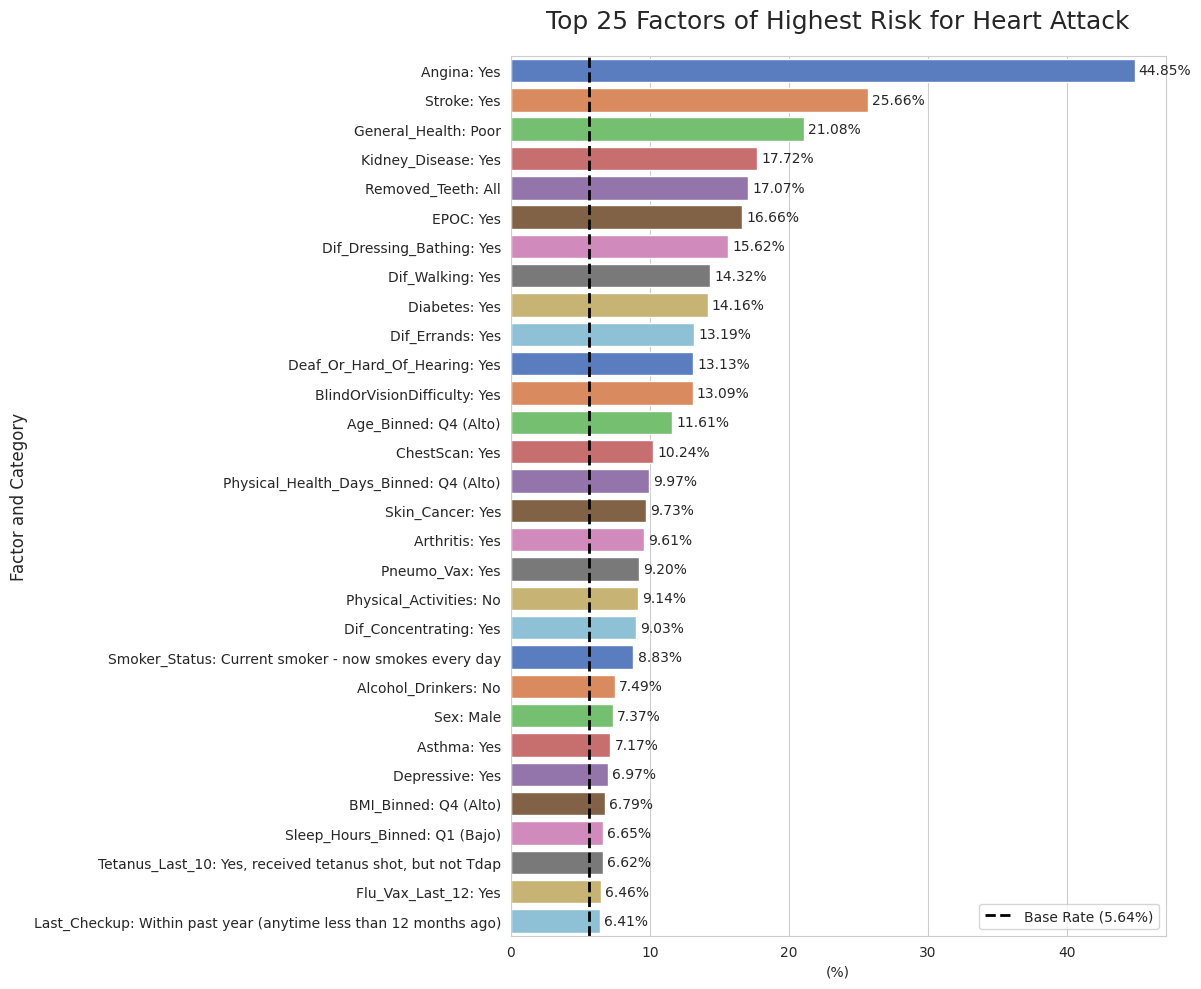

In [ ]:
# Gráfico del TOP 25 factor y categoria más relevantes
top_factores = tabla_final.head(30)

# Crear una nueva columna con una etiqueta más clara para el gráfico,
top_factores['Etiqueta'] = top_factores['Factor'] + ": " + top_factores['High Risk Category']

# Gráfico
plt.figure(figsize=(12, 10))
barplot = sns.barplot(x='Risk Rate (%)', y='Etiqueta', data=top_factores, palette=palette)
riesgo_promedio = df1['Heart_Attack_Num'].mean() * 100
plt.axvline(x=riesgo_promedio, color='black', linestyle='--', linewidth=2,
  label=f'Base Rate ({riesgo_promedio:.2f}%)')
plt.title('Top 25 Factors of Highest Risk for Heart Attack', fontsize=18, pad=20)
plt.xlabel('(%)')
plt.ylabel('Factor and Category', fontsize=12)

# Añadir los valores al final de cada barra para más claridad.
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.3, p.get_y() + p.get_height()/2,f'{width:.2f}%',va='center')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Análisis de factor de riesgo por columna

# Función para graficar las columnas con mayor riesgo
def analysi_risk(df1, column, target_column='Heart_Attack'):
    tax_yes_2 = df1[target_column].value_counts(normalize=True)['Yes']*100
    df_temp = df1.dropna(subset=[target_column, column])
    risk = df_temp.groupby(column)[target_column].value_counts(normalize=True).unstack().fillna(0)
    if 'Yes' in risk.columns:
        risk = risk.sort_values(by='Yes', ascending=False)
        risk['Yes_pct'] = risk['Yes']*100
        print(f"\n Risk rate for: {column} ")
        display((risk['Yes_pct']).round(2).astype(str) + '%')

        plt.figure(figsize=(10, 5))
        palette2 = sns.color_palette("Set2")
        barplot = sns.barplot(x=risk['Yes_pct'], y=risk.index, palette=palette, legend=True)
        for i, v in enumerate(risk['Yes_pct']):
            barplot.text(v + 0.5, i, (f'{v:.2f}%'), color='black', va='center')
        plt.title(f'Risk rate for {column}', fontsize=16)
        plt.ylabel(column, fontsize=12)
        plt.xlabel('Risk Rate', fontsize=12)
        plt.xlim(0, max(risk['Yes_pct'].max(), tax_yes_2))
        plt.axvline(x=tax_yes_2, color='black', linestyle='--', label=f'Base Rate ({tax_yes_2:.2f}%)')
        plt.legend()
        plt.tight_layout()
        plt.show()


 Risk rate for: Angina 


,Yes_pct
Angina,
Yes,44.85%
No,3.15%


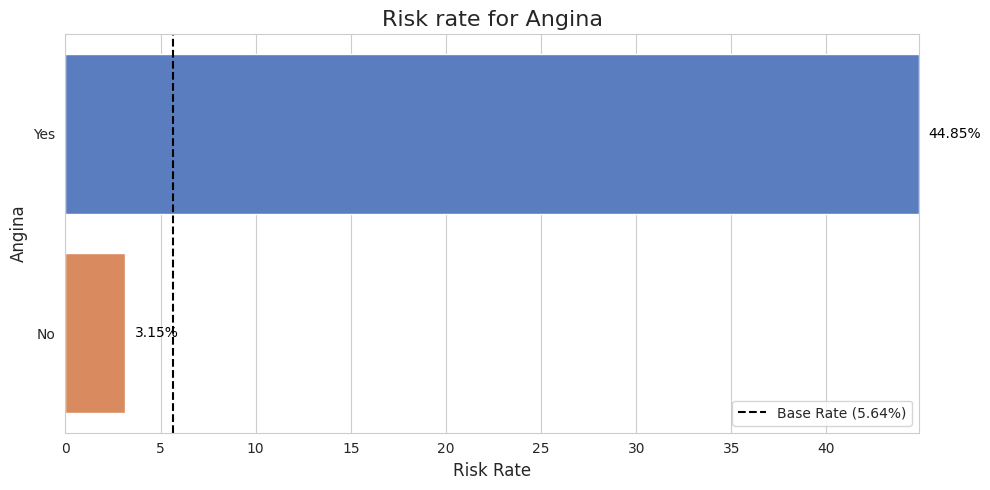


 Risk rate for: Stroke 


,Yes_pct
Stroke,
Yes,25.66%
No,4.74%


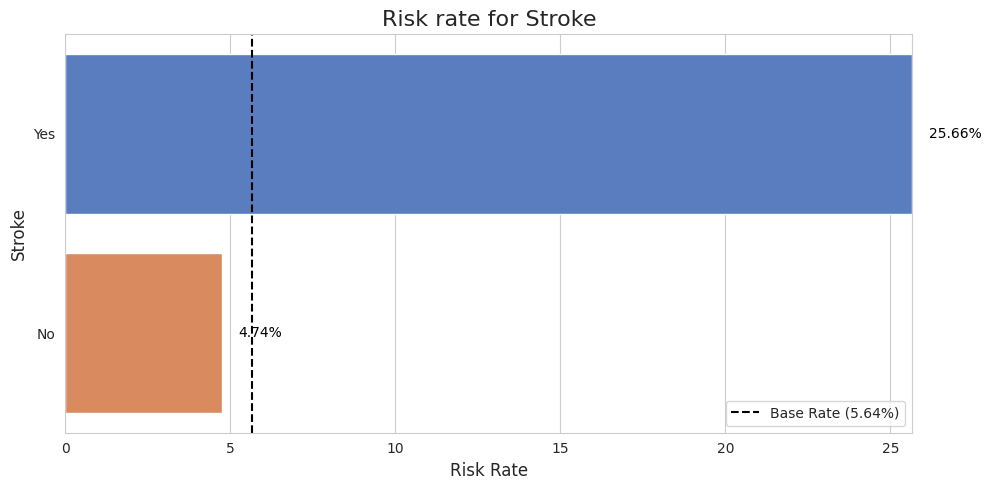


 Risk rate for: General_Health 


,Yes_pct
General_Health,
Poor,21.08%
Fair,11.99%
Good,5.78%
Very good,2.89%
Excellent,1.53%


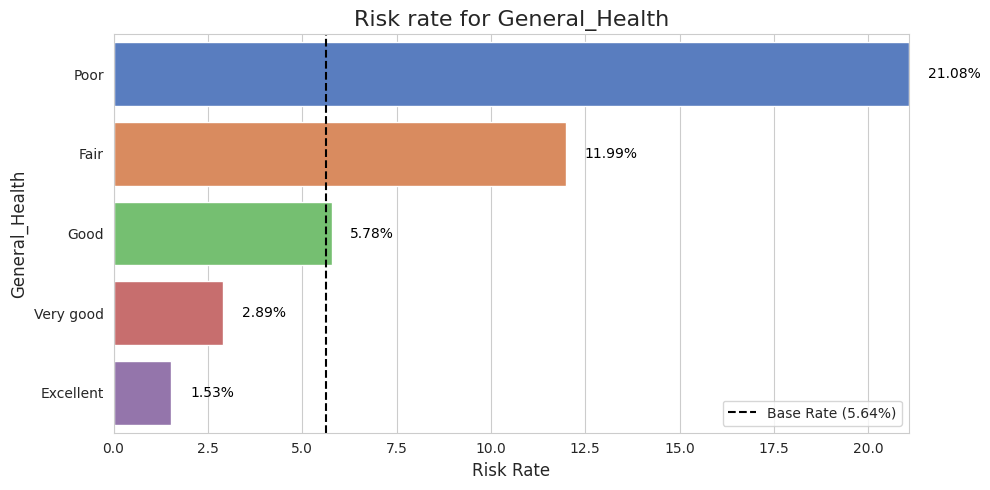


 Risk rate for: Kidney_Disease 


,Yes_pct
Kidney_Disease,
Yes,17.72%
No,5.06%


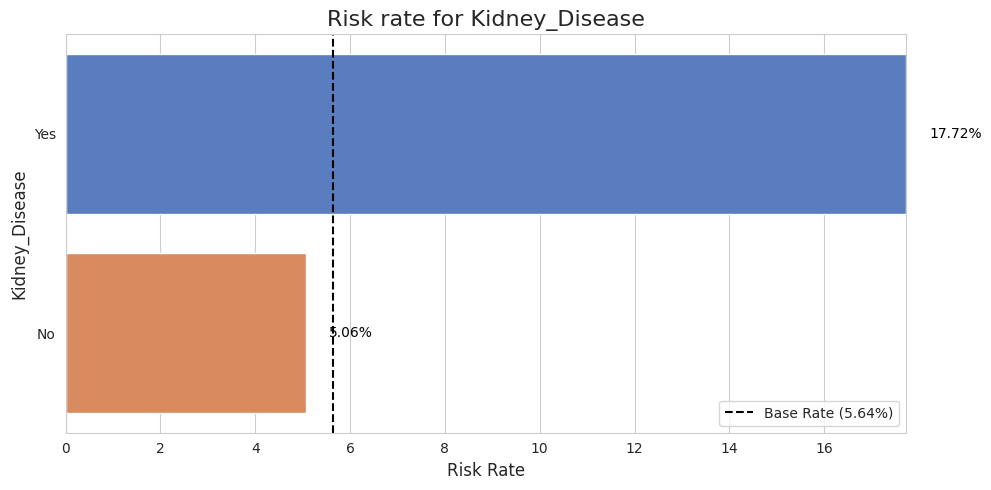


 Risk rate for: EPOC 


,Yes_pct
EPOC,
Yes,16.66%
No,4.68%


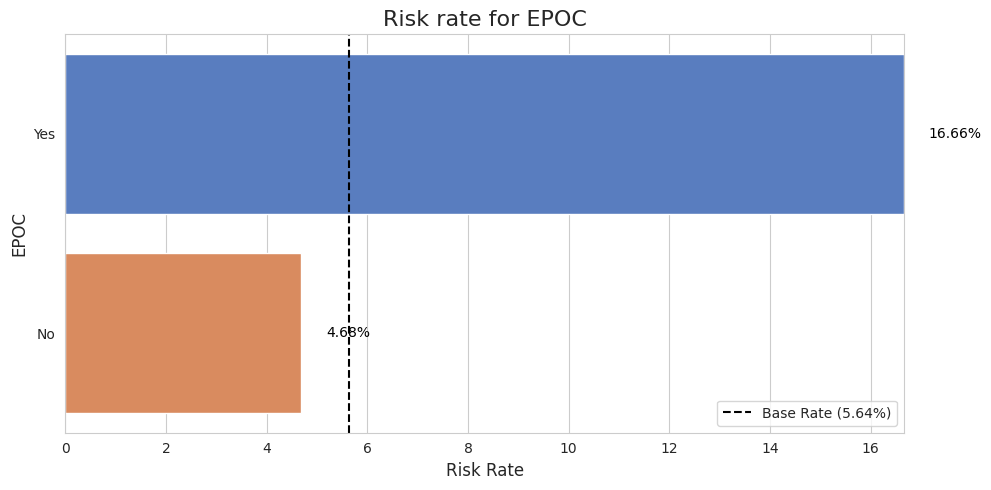


 Risk rate for: Dif_Dressing_Bathing 


,Yes_pct
Dif_Dressing_Bathing,
Yes,15.62%
No,5.25%


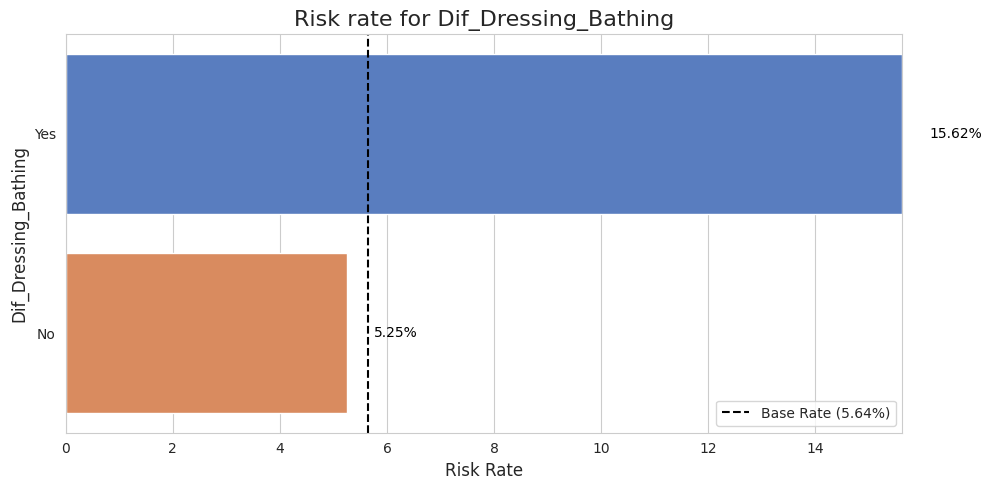


 Risk rate for: Dif_Walking 


,Yes_pct
Dif_Walking,
Yes,14.32%
No,4.07%


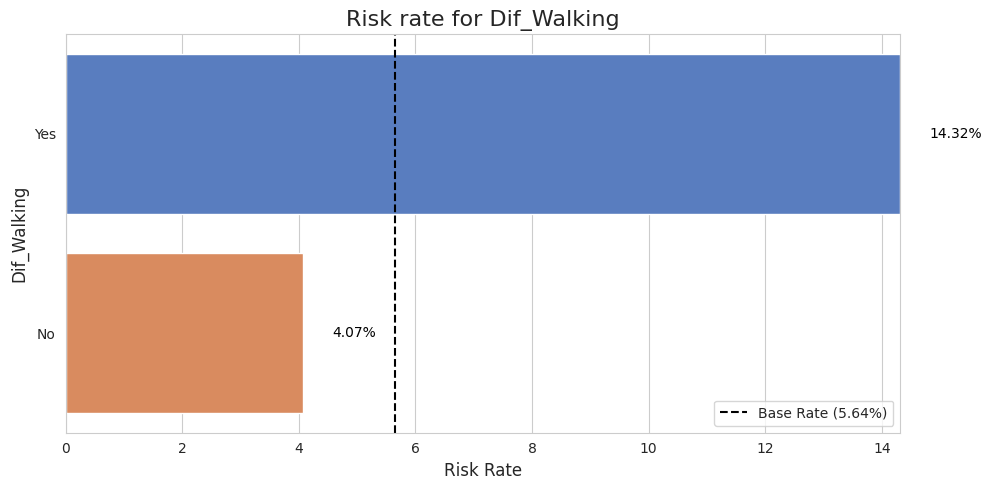


 Risk rate for: Diabetes 


,Yes_pct
Diabetes,
Yes,14.16%
"No, pre-diabetes or borderline diabetes",7.6%
No,4.2%
"Yes, but only during pregnancy (female)",2.89%


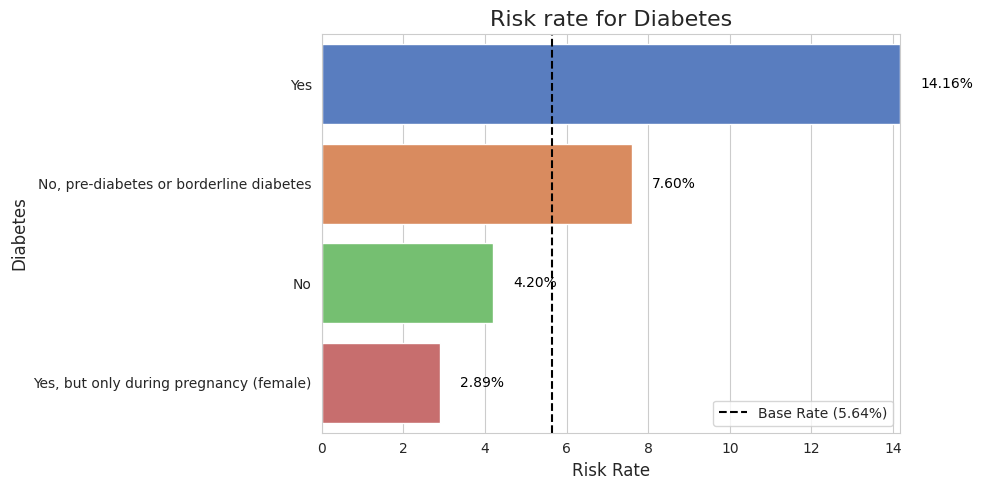

In [ ]:
# Analizar

analysi_risk(df, 'Angina')

analysi_risk(df, 'Stroke')

analysi_risk(df, 'General_Health')

analysi_risk(df, 'Kidney_Disease')

analysi_risk(df, 'EPOC')

analysi_risk(df, 'Dif_Dressing_Bathing')

analysi_risk(df, 'Dif_Walking')

analysi_risk(df, 'Diabetes')

Impacto de las Comorbilidades: El análisis de las condiciones médicas preexistentes revela hallazgos cruciales. Dejando de lado la angina y el infarto (condiciones directamente ligadas a un evento cardíaco), los factores con mayor poder discriminante son:

Una autoevaluación de salud general "Pobre".

Diagnóstico de enfermedad renal crónica.

Enfermedad Pulmonar Obstructiva Crónica (EPOC).

La extracción total de la dentadura, un posible indicador de un historial de salud deficiente y falta de cuidado preventivo.

Dificultades motoras severas (para caminar o vestirse).

Diabetes.

#### Conclusión final EDA:

Combinando todos los hallazgos, el perfil de máximo riesgo identificado en el análisis exploratorio es un hombre multirracial o blanco, mayor de 55 años, con un historial de salud general deficiente, evidenciado por condiciones crónicas como enfermedad renal, EPOC o diabetes, y/o limitaciones funcionales significativas.

## 4. Modelo de achine Learning

In [ ]:
df.columns

Index(['State', 'Sex', 'General_Health', 'Physical_Health_Days',
       'Mental_Health_Days', 'Last_Checkup', 'Physical_Activities',
       'Sleep_Hours', 'Removed_Teeth', 'Heart_Attack', 'Angina', 'Stroke',
       'Asthma', 'Skin_Cancer', 'EPOC', 'Depressive', 'Kidney_Disease',
       'Arthritis', 'Diabetes', 'Deaf_Or_Hard_Of_Hearing',
       'BlindOrVisionDifficulty', 'Dif_Concentrating', 'Dif_Walking',
       'Dif_Dressing_Bathing', 'Dif_Errands', 'Smoker_Status',
       'ECigaretteUsage', 'ChestScan', 'Race_Ethnicity', 'Age', 'Height(m)',
       'Weight(kg)', 'BMI', 'Alcohol_Drinkers', 'HIV', 'Flu_Vax_Last_12',
       'Pneumo_Vax', 'Tetanus_Last_10', 'High_Risk_Last_Year', 'Covid_pos'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Copia para el modelo
df_model = df.copy()

#Convertir la variable objetivo a 0 y 1
df_model['Heart_Attack'] = df_model['Heart_Attack'].apply(lambda x: 1 if x == 'Yes' else 0)

# Copiar el dataframe y seleccionar columnas para el modelo
# Excluimos las columnas Angina y Stroke que son practicamente un sinonimo de ataque al corazón
# También expluimos Weight(kg) y Height(m) ya que tienen multicolinealidad con BMI
columnas_finales = [
       'State', 'Sex', 'General_Health', 'Physical_Health_Days',
       'Mental_Health_Days', 'Last_Checkup', 'Physical_Activities',
       'Sleep_Hours', 'Removed_Teeth', 'Heart_Attack',
       'Asthma', 'Skin_Cancer', 'EPOC', 'Depressive', 'Kidney_Disease',
       'Arthritis', 'Diabetes', 'Deaf_Or_Hard_Of_Hearing',
       'BlindOrVisionDifficulty', 'Dif_Concentrating', 'Dif_Walking',
       'Dif_Dressing_Bathing', 'Dif_Errands', 'Smoker_Status',
       'ECigaretteUsage', 'ChestScan', 'Race_Ethnicity', 'Age', 'BMI',
       'Alcohol_Drinkers', 'HIV', 'Flu_Vax_Last_12',
       'Pneumo_Vax', 'Tetanus_Last_10', 'High_Risk_Last_Year', 'Covid_pos'
]
df_model = df_model[columnas_finales]

# Identificar todas las columnas de tipo 'object' o 'category' para convertirlas
columnas_one_hot = df_model.select_dtypes(include=['object', 'category']).columns.tolist()

# Aplicar One-Hot Encoding. 'drop_first=True' evita el sesgo del modelo
df_model_encoded = pd.get_dummies(df_model, columns = columnas_one_hot, drop_first=True) # Usamos dropna para simplificar

# Separar en características (X) y objetivo (y)
X = df_model_encoded.drop('Heart_Attack', axis=1)
y = df_model_encoded['Heart_Attack']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Accuracy model: 94.35%




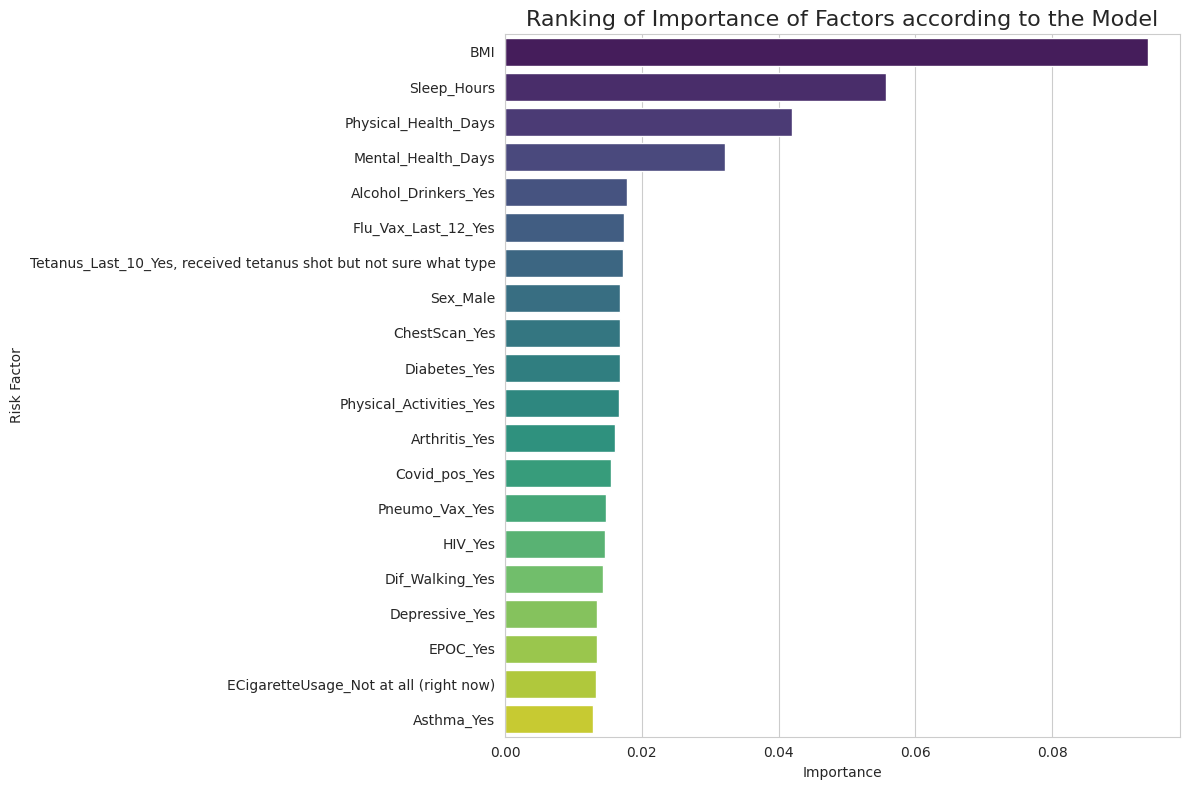

In [ ]:
# Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
print(f"\nAccuracy model: {accuracy_score(y_test, y_pred):.2%}")
print('\n')

# Obtener y graficar la importancia de las características
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False).head(20) # Mostramos los 20 más importantes

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importances, palette='viridis')
plt.title('Ranking of Importance of Factors according to the Model', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Risk Factor')
plt.tight_layout()
plt.show()
plt.show()

# 5. Conclusiones y Propuesta de Valor para el Negocio
## 5.1. Resumen Ejecutivo: Del Dato a la Decisión
Este análisis ha revelado una dualidad fundamental en la predicción del riesgo cardiovascular. Nuestro modelo, con una precisión del 94.35%, nos ha permitido ir más allá de los factores obvios para diseñar una estrategia de negocio integral.

Hemos descubierto dos tipos distintos de indicadores de riesgo que requieren acciones diferenciadas:

Indicadores de Alarma (EDA): Son condiciones como una mala salud general, enfermedad renal o dificultades motoras graves. Aunque afectan a un subconjunto de la cartera, su presencia dispara el riesgo de siniestro de forma exponencial.

Indicadores Fundamentales (Machine Learning): Son métricas de salud "basales" como el Índice de Masa Corporal (IMC), las horas de sueño y los días de buena salud física y mental. Estas variables definen el estado de salud general y son los mejores predictores a nivel global.

Una estrategia efectiva debe ser dual: actuar quirúrgicamente sobre los casos de alarma y, a la vez, mejorar de forma general los indicadores fundamentales de toda la base de clientes.

## 5.2. Perfiles de Riesgo y Oportunidad de Negocio
A partir de este doble enfoque, segmentamos la cartera de clientes de la siguiente manera:

Segmento de Riesgo Crítico (EDA): Clientes que presentan una o más de las "condiciones de alarma" (salud general pobre, enfermedad renal, EPOC, diabetes.). Son el foco para una intervención de alta intensidad para reducir costes inminentes.

Segmento de Riesgo Acumulativo (Machine Learning): Clientes sin condiciones de alarma, pero con una mala combinación de indicadores fundamentales como. IMC alto, pocas horas de sueño, elevados días de mala salud física, consumidores habituales de alcohol. Este es el segmento más grande y donde las iniciativas de bienestar a gran escala pueden prevenir la aparición de condiciones crónicas.

## 5.3. Plan de Acción Estratégico: "Salud Proactiva 360"

Proponemos un programa de dos pilares que aborda las conclusiones de ambos análisis:

Pilar 1: Unidad de Gestión de Casos Críticos (EDA)

Acción: Crear un equipo especializado que contacte proactivamente a los clientes del Segmento de Riesgo Crítico. Se les ofrecerá, sin coste, un plan de seguimiento personalizado que incluye telemedicina, recordatorios de medicación y coordinación de citas. El objetivo es evitar hospitalizaciones y visitas a urgencias.

Impacto de Negocio: Reducción directa y a corto plazo de los siniestros más costosos. Fidelización de los clientes más vulnerables.

Pilar 2: Programa de Bienestar "Mi Salud Base" (Machine Learning)

Acción: Lanzar un programa de incentivos a través de la app de la aseguradora para todos los clientes, enfocado en mejorar los Indicadores Fundamentales:

Reto IMC: Descuentos en la prima por demostrar una reducción o mantenimiento del IMC en un rango saludable durante un año.

Reto del Sueño: GAcumulación de puntos canjeables por recompensas al mantener una media de 7-8 horas de sueño, monitorizado a través de apps de salud mas populares como Google Fit, Apple Health.

Apoyo a la Salud Mental y Física: Ofrecer acceso gratuito a apps de meditación y fitness a los clientes que reporten un alto número de días de mala salud.

Impacto de Negocio: Reducción del riesgo a largo plazo en toda la cartera. Mejora de la imagen de marca y aumento de la interacción digital con los clientes.

## 5.4. Siguientes Pasos y Proyección del Impacto

**Proyección:**

La implementación de este plan dual tiene el potencial de no solo reducir los costes de los siniestros actuales en el grupo crítico, sino también de disminuir la cantidad de futuros clientes crónicos en hasta un 10-15% en los próximos 3 años. El 25% de nuestros clientes se encuentra en el perfil de 'alto riesgo', con una tasa de éxito del 40% daría el 10% y si fuese de un 60% llegaria hasta el 15%.

**Próximos Pasos:**

Implementar la Herramienta de Scoring: Integrar el modelo predictivo para que el sistema alerte automáticamente qué clientes pertenecen al "Segmento de Riesgo Crítico" y al "Segmento de Riesgo Acumulativo".

Lanzar Piloto de la Unidad de Gestión (6 Meses): Iniciar el Pilar 1 con una muestra de 500 clientes para validar el modelo de intervención y medir el ROI.

Desplegar el Programa "Mi Salud Base" (a partir del 3er Mes): Las iniciativas del Pilar 2 se pueden lanzar de forma escalonada a toda la cartera a través de campañas de marketing digital.

Este proyecto demuestra que la combinación de un análisis estadístico clásico (EDA) y técnicas de Machine Learning nos proporciona una visión completa y accionable, permitiendo a la compañía proteger la salud de sus clientes y, a la vez, su propia salud financiera.